In [72]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
import FoFCatalogMatching
import GCRCatalogs

In [253]:
# Getting the most massive halo from the catalog
extragalactic_cat = GCRCatalogs.load_catalog('proto-dc2_v2.1.2_test')
massive_halos = extragalactic_cat.get_quantities(['halo_mass', 'redshift','ra', 'dec'], filters=['halo_mass > 1e14','is_central==True'])

m = massive_halos['halo_mass']
select = (m == np.max(m))
ra_cl = massive_halos['ra'][select][0]
dec_cl = massive_halos['dec'][select][0]
z_cl = massive_halos['redshift'][select][0]
print(m[select], ra_cl, dec_cl, z_cl)

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/envs/clmassmod-nostack/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:105: UserWarning: No md5 sum specified in the config file
  warnings.warn('No md5 sum specified in the config file')


[  5.95588752e+14] 1.15419 2.20399 0.354081722946


In [254]:
ra_min, ra_max = ra_cl-0.1, ra_cl+0.1
dec_min, dec_max = dec_cl-0.1, dec_cl+0.1
z_min = z_cl + 0.1
z_max = 1.5

coord_filters = [
    'ra >= {}'.format(ra_min),
    'ra < {}'.format(ra_max),
    'dec >= {}'.format(dec_min),
    'dec < {}'.format(dec_max),
]
z_filters = ['redshift >= {}'.format(z_min),'redshift < {}'.format(z_max)]
gal_cat = extragalactic_cat.get_quantities(['ra', 'dec', 'shear_1', 'shear_2', 'shear_2_phosim', 'shear_2_treecorr','redshift'], filters=(coord_filters + z_filters))



In [255]:
#coadd_cat = GCRCatalogs.load_catalog('dc2_coadd_run1.1p')
#coadd_gal_cat = extragalactic_cat.get_quantities(['ra', 'dec', '', 'shear2', 'redshift'], filters=coord_filters)


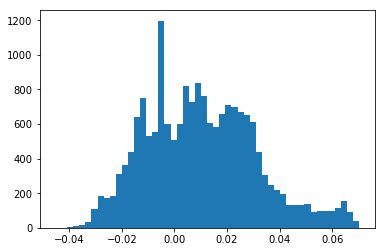

In [256]:
ra = gal_cat['ra']
dec = gal_cat['dec']
shear1 = gal_cat['shear_1']
shear2 = gal_cat['shear_2']
z = gal_cat['redshift']
tmp = plt.hist(shear1, bins=50)



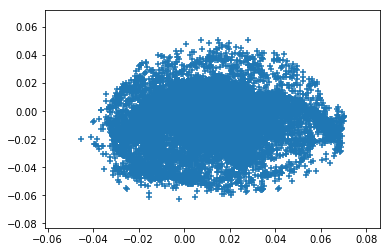

In [257]:
plt.scatter(shear1, shear2, marker='+')

In [258]:
phi = np.arctan2(dec-dec_cl, ra-ra_cl)
print(len(phi), len(shear1))
gamt = - (shear1 * np.cos(2.0 * phi) - shear2 * np.sin(2.0 * phi))
gamc = - shear1 * np.sin(2.0 * phi) + shear2 * np.cos(2.0 * phi)
print(phi*180./np.pi)

18253 18253
[ 85.19184875  65.32835388  85.04910278 ...,  54.02383423  62.08194351
  29.24395561]


In [259]:
theta = np.sqrt((ra-ra_cl)**2+(dec-dec_cl)**2)*np.pi/180.
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
phys_dist = theta * cosmo.angular_diameter_distance(z).value


(array([   4.,   17.,   47.,   50.,   41.,   55.,   86.,  103.,  127.,
         175.,  181.,  238.,  281.,  381.,  415.,  432.,  451.,  529.,
         479.,  536.,  566.,  563.,  500.,  594.,  659.,  746.,  782.,
         795.,  816.,  743.,  684.,  663.,  659.,  662.,  650.,  547.,
         516.,  525.,  434.,  372.,  343.,  274.,  156.,  144.,   93.,
          52.,   29.,   31.,   13.,   14.]),
 array([ 0.01611452,  0.09366621,  0.17121791,  0.2487696 ,  0.32632129,
         0.40387298,  0.48142468,  0.55897637,  0.63652806,  0.71407976,
         0.79163145,  0.86918314,  0.94673483,  1.02428653,  1.10183822,
         1.17938991,  1.25694161,  1.3344933 ,  1.41204499,  1.48959669,
         1.56714838,  1.64470007,  1.72225176,  1.79980346,  1.87735515,
         1.95490684,  2.03245854,  2.11001023,  2.18756192,  2.26511361,
         2.34266531,  2.420217  ,  2.49776869,  2.57532039,  2.65287208,
         2.73042377,  2.80797546,  2.88552716,  2.96307885,  3.04063054,
         3.11818

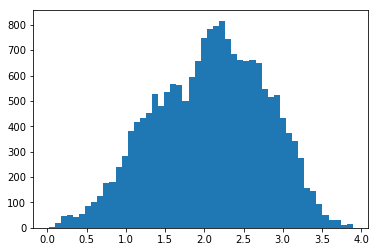

In [260]:
plt.hist(phys_dist, bins=50)

In [261]:
#lnr_arr = np.linspace(np.log(0.5), np.log(3), 10)
r_arr = np.linspace(0.75,3,10)#np.exp(lnr_arr)
nr = len(r_arr)-1
rmean_arr = np.zeros(nr)
gamt_arr = np.zeros(nr)
gamt_err_arr = np.zeros(nr)
gamc_arr = np.zeros(nr)
for ir in range(nr):
    r_min = r_arr[ir]
    r_max = r_arr[ir+1]
    select = (phys_dist >= r_min) & (phys_dist < r_max)
    rmean_arr[ir] = np.mean(phys_dist[select])
    print(np.mean(gamt[select]), len(gamt[select]))
    gamt_arr[ir] = np.mean(gamt[select])
    gamt_err_arr[ir] = np.std(gamt[select])
    gamc_arr[ir] = np.mean(gamc[select])

0.0413462 695
0.0373569 1286
0.0344281 1571
0.0313234 1780
0.0221509 1983
0.0183948 2583
0.0172684 2249
0.0143182 2111
0.0124074 1654


<Container object of 3 artists>

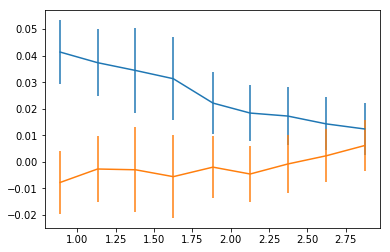

In [262]:
plt.errorbar(rmean_arr, gamt_arr, yerr=gamt_err_arr)
plt.errorbar(rmean_arr, gamc_arr, yerr=gamt_err_arr)
#plt.xscale('log')
#plt.yscale('log')

(array([   4.,    7.,   17.,   24.,   42.,   81.,  144.,  194.,  187.,
         170.,   58.,   45.,   38.,   38.,   78.,  124.,  101.,   66.,
         104.,   88.,   60.,   58.,   59.,   63.,   57.,   62.,   77.,
          51.,   30.,   15.]),
 array([ -3.09488960e-02,  -2.90142272e-02,  -2.70795585e-02,
         -2.51448898e-02,  -2.32102210e-02,  -2.12755523e-02,
         -1.93408836e-02,  -1.74062148e-02,  -1.54715461e-02,
         -1.35368774e-02,  -1.16022086e-02,  -9.66753991e-03,
         -7.73287117e-03,  -5.79820244e-03,  -3.86353371e-03,
         -1.92886498e-03,   5.80375393e-06,   1.94047249e-03,
          3.87514122e-03,   5.80980995e-03,   7.74447868e-03,
          9.67914741e-03,   1.16138161e-02,   1.35484849e-02,
          1.54831536e-02,   1.74178223e-02,   1.93524911e-02,
          2.12871598e-02,   2.32218285e-02,   2.51564973e-02,
          2.70911660e-02]),
 <a list of 30 Patch objects>)

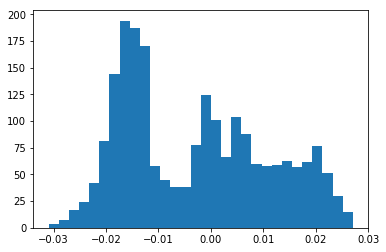

In [243]:
plt.hist(gamt[select], bins=30)                          